In [18]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import load_files
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
import pandas as pd, numpy as np, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import csv
import datetime
import pickle

In [19]:
# 由于 train_data.txt 与 test.txt 的文件内容组织形式不一样，所以我们需要分别将其转化为统一的 csv 格式
def txt_to_csv_train(filePathSrc, filePathDst):
    list_data = []
    with open(filePathSrc, 'r', encoding='utf-8') as input_file, open(filePathDst, 'w', newline='') as output_file:
        for data in input_file:
            data = eval(data)
            list_data.append(data)
        keys = list_data[0].keys()
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(list_data)

def txt_to_csv_test(filePathSrc, filePathDst):
    with open(filePathSrc, 'r', encoding='utf-8') as input_file, open(filePathDst, 'w', newline='') as output_file:
        stripped = (line.strip('\n') for line in input_file)
        # 这里只需要用第一个逗号进行分割，因为一个句子中可能有很多个逗号
        lines = (line.split(', ', 1) for line in stripped if line)
        writer = csv.writer(output_file)
        writer.writerows(lines)

## SVM

In [3]:
txt_to_csv_train('train_data.txt', 'train_data.csv')
txt_to_csv_test('test.txt', 'test.csv')

dataset_train = pd.read_csv('train_data.csv')
X = dataset_train.drop('label', axis=1)
y = dataset_train['label']
# X = X.to_numpy()
X = X.values.tolist()
# print(X)
list1 = []
for index_i in range(len(X)):
    for index_j in range(len(X[index_i])):
        list1.append(X[index_i][index_j])
# print(list1)
tv = TfidfVectorizer(stop_words='english')
X_fit = tv.fit_transform(list1).toarray()
print(X_fit.shape)

# 数据集划分，进行模型的训练以及预测
X_train, X_val, y_train, y_val = train_test_split(X_fit, y, test_size=0.2, random_state=42)
model = SVC(kernel='linear', C=2.0, random_state=42)
print('this model is running')
starttime = datetime.datetime.now()
model.fit(X_train, y_train)
endtime = datetime.datetime.now()
print('this model finishes running, running time:', (endtime - starttime).seconds, 'seconds.')
score = model.score(X_val, y_val)
print("Model score:", score)

(8000, 29697)
this model is running
this model finishes running, running time: 398 seconds.
Model score: 0.958125


In [4]:
grid = GridSearchCV(SVC(kernel='linear'), param_grid={"C":[0.5, 1, 2, 3, 4]}, cv=4)
print('start selecting...')
grid.fit(X_fit, y)
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

start selecting...
The best parameters are {'C': 2} with a score of 0.89


## 逻辑回归

In [5]:
# 数据集划分，进行模型的训练以及预测
X_train, X_val, y_train, y_val = train_test_split(X_fit, y, test_size=0.2, random_state=42)
model = LogisticRegression(penalty='l2', C=10, random_state=42, max_iter=200)
print('this model is running')
starttime = datetime.datetime.now()
model.fit(X_train, y_train)
endtime = datetime.datetime.now()
print('this model finishes running, running time:', (endtime - starttime).seconds, 'seconds.')
score = model.score(X_val, y_val)
print("Model score:", score)

this model is running
this model finishes running, running time: 32 seconds.
Model score: 0.95125


In [6]:
grid = GridSearchCV(LogisticRegression(max_iter=300), param_grid={"C":[1, 2, 5, 10], "penalty":['l2']}, cv=4)
print('start selecting...')
grid.fit(X_fit, y)
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

start selecting...
The best parameters are {'C': 10, 'penalty': 'l2'} with a score of 0.90


## MLP

In [17]:
txt_to_csv_train('train_data.txt', 'train_data.csv')
txt_to_csv_test('test.txt', 'test.csv')

dataset_train = pd.read_csv('train_data.csv')
X = dataset_train.drop('label', axis=1)
y = dataset_train['label']
# X = X.to_numpy()
X = X.values.tolist()
# print(X)
list1 = []
for index_i in range(len(X)):
    for index_j in range(len(X[index_i])):
        list1.append(X[index_i][index_j])
# print(list1)
tv = TfidfVectorizer(stop_words='english')
X_fit = tv.fit_transform(list1).toarray()
print(X_fit.shape)

# 数据集划分，进行模型的训练以及预测
X_train, X_val, y_train, y_val = train_test_split(X_fit, y, test_size=0.2, random_state=42) 
    
    
# 使用多层感知器 (MLP) 进行模型训练
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=200, random_state=42)
    
print('this model is running')
starttime = datetime.datetime.now()
model.fit(X_train, y_train)
endtime = datetime.datetime.now()
print('this model finishes running')
print('this model finishes running, running time:', (endtime - starttime).seconds, 'seconds.')
score = model.score(X_val, y_val)
print("Model score:", score)

# 计算模型的准确率
accuracy = accuracy_score(y_val, model.predict(X_val))
print("Model Accuracy:", accuracy)

# 计算模型的精确率
precision = precision_score(y_val, model.predict(X_val), average='macro')
print("Model Precision:", precision)

# 计算模型的召回率
recall = recall_score(y_val, model.predict(X_val), average='macro')
print("Model Recall:", recall)

# 计算模型的F1分数
f1 = f1_score(y_val, model.predict(X_val), average='macro')
print("Model F1 Score:", f1)


(8000, 29697)
this model is running
this model finishes running
this model finishes running, running time: 279 seconds.
Model score: 0.95625
Model Accuracy: 0.95625


NameError: name 'precision_score' is not defined

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# 定义MLP模型
model = MLPClassifier(max_iter=200, random_state=42)

# 定义要搜索的参数范围
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (200, 100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
}

# 创建GridSearchCV对象
grid = GridSearchCV(model, param_grid, cv=4)

print('start selecting...')
grid.fit(X_fit, y)
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


start selecting...
The best parameters are {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50)} with a score of 0.90


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# 创建决策树模型
decision_tree = DecisionTreeClassifier()

# 定义要优化的参数范围
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(decision_tree, param_grid, cv=4)

print('start selecting...')

# 执行网格搜索
grid_search.fit(X_fit, y)

# 输出最佳参数和对应的评分
print("The best parameters are %s with a score of %0.2f" %(grid_search.best_params_, grid_search.best_score_))


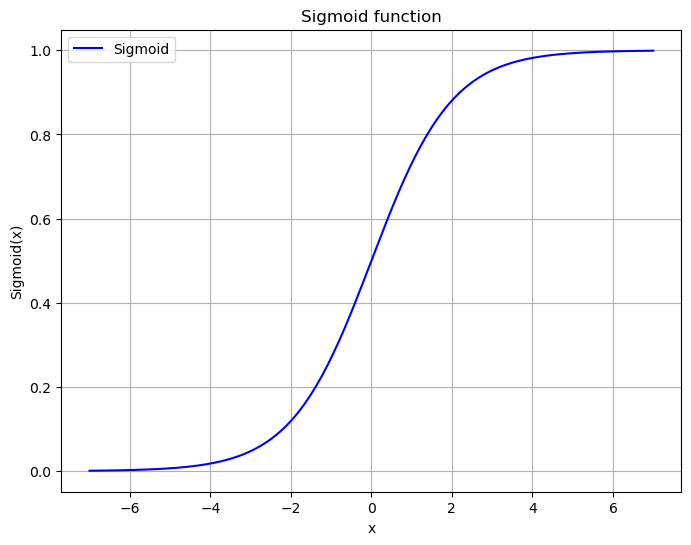

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 创建输入值的范围
x = np.linspace(-7, 7, 200)

# 计算 Sigmoid 函数的输出
sigmoid = 1 / (1 + np.exp(-x))

# 绘制 Sigmoid 函数
plt.figure(figsize=(8, 6))
plt.plot(x, sigmoid, label='Sigmoid', color='b')
plt.title('Sigmoid function')
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.grid(True)
plt.legend()
plt.show()


In [25]:
# 读取文件 1
with open("results_DecisionTree.txt", "r") as file1:
    lines1 = file1.readlines()

# 读取文件 2
with open("results_MLP.txt", "r") as file2:
    lines2 = file2.readlines()

# 转换为集合并获取不同的行
set1 = set(lines1)
set2 = set(lines2)

differences = set1.symmetric_difference(set2)

# 输出不同行的个数
print("使用 MLP 和决策树训练出来的数据有：", len(differences), "行的不同。")
# 输出不同的行
for line in differences:
    print(line)


使用 MLP 和决策树训练出来的数据有： 1124 行的不同。
320, 0

1019, 8

975, 7

281, 7

1398, 5

1698, 6

737, 1

1794, 6

1026, 0

1907, 6

1285, 0

479, 4

1574, 4

869, 2

105, 7

1948, 3

1974, 4

758, 6

1447, 7

1586, 6

631, 9

843, 0

1838, 8

1881, 1

222, 8

1884, 8

1322, 9

692, 5

1628, 8

1511, 6

622, 9

406, 6

871, 9

766, 7

106, 9

813, 9

1723, 2

501, 8

1408, 5

1, 1

1862, 6

531, 9

1611, 7

1407, 6

1396, 9

1971, 2

655, 7

637, 8

163, 7

868, 5

345, 1

1666, 9

359, 1

1499, 3

1333, 7

1506, 2

1452, 7

925, 2

114, 3

154, 0

693, 9

522, 8

807, 0

1564, 6

490, 1

1701, 0

1025, 7

1550, 9

990, 2

1560, 3

1042, 2

575, 2

936, 0

1500, 8

1498, 5

1669, 6

1792, 6

1701, 5

1336, 6

1792, 0

1106, 4

1914, 2

909, 2

1329, 8

895, 7

336, 7

1106, 3

305, 9

1698, 0

797, 6

1263, 7

1527, 8

1884, 2

1927, 5

222, 3

436, 4

1810, 4

1628, 4

478, 2

1534, 6

1943, 8

1029, 5

1433, 1

289, 5

813, 8

881, 5

1903, 8

1823, 6

140, 8

1162, 2

811, 2

1751, 2

995, 7

1231

In [26]:
# 读取文件 1
with open("results_LR.txt", "r") as file1:
    lines1 = file1.readlines()
print("end")
# 读取文件 2
with open("results_SVM.txt", "r") as file2:
    lines2 = file2.readlines()
print("end")
# 转换为集合并获取不同的行
set1 = set(lines1)
set2 = set(lines2)
print("end")
differences = set1.symmetric_difference(set2)
print("end")
# 输出不同行的个数
print("使用 逻辑回归 和SVM训练出来的数据有：", len(differences), "行的不同。")
# 输出不同的行
for line in differences:
    print(line)


end
end
end
end
使用 逻辑回归 和SVM训练出来的数据有： 104 行的不同。
320, 0

128, 0

622, 9

406, 6

655, 7

522, 8

1655, 7

1062, 6

811, 2

1010, 3

1858, 2

632, 5

52, 7

1189, 7

1871, 8

1440, 9

459, 9

1267, 0

1658, 2

1696, 6

1729, 0

1455, 8

723, 2

1251, 3

1605, 6

1487, 5

1030, 2

1852, 4

889, 5

169, 0

811, 7

328, 3

1254, 7

527, 6

1981, 0

1981, 5

1658, 8

1852, 8

1605, 9

625, 5

882, 6

1189, 2

968, 8

1251, 8

1267, 5

1765, 9

1030, 3

1898, 5

390, 2

1696, 9

822, 0

882, 9

690, 0

1455, 3

204, 2

169, 6

1871, 2

204, 6

1487, 0

822, 5

191, 3

1025, 2

320, 6

625, 0

667, 0

191, 2

910, 7

1542, 5

723, 5

889, 1

1858, 4

901, 3

390, 4

1440, 0

632, 0

910, 8

1062, 9

1898, 6

901, 7

52, 2

321, 2

667, 6

1025, 8

599, 0

321, 7

1655, 2

328, 4

1254, 3

522, 3

690, 5

1765, 6

655, 2

459, 6

622, 0

1542, 0

367, 0

1010, 2

406, 0

599, 5

367, 1

968, 4

128, 5

1729, 5

527, 0

